In [ ]:
!pip install PythonTools

In [ ]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import collections as CS
import os
import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Simple Implementation of Dijkstra Algorithm

## Dijkstra algorithm

In [ ]:
from __future__ import absolute_import, division, print_function
import collections as CS

__author__ = 'Mosatafa Hadavand'
__date__ = 'April 2017'
__version__ = '1.000'


class Dijkstra:

    '''
    This is a class to implement dijkstra algorithm 
    '''
    
    def __init__(self):
        self.Nodes = set()
        self.Edges = CS.defaultdict(list)
        self.Distances = {}

    def add_node(self, value):
        self.Nodes.add(value)

    def add_edge(self, From, To, distance):
        self.Edges[From].append(To)
        self.Edges[To].append(From)
        self.Distances[(From, To)] = distance
        self.Distances[(To,From)] = distance


    def find_path(self,initial):

        visited = {initial: 0}
        path = {}
        Path_All=CS.defaultdict(list)
        Path_All[initial].append(initial)


        # Sort unvisted Nodes (initially all the nodes are unvisited)
        #------------------------------------------------------------
        unvisited = set(self.Nodes)

        while unvisited:

            min_node = None
            # Identifying the node with minmum distance in current loop
            for node in unvisited:
                if node in visited:
                    if min_node is None:
                        min_node = node
                    elif visited[node] < visited[min_node]:
                        min_node = node

            if min_node is None:
                break

            unvisited.remove(min_node)
            Current_Dist = visited[min_node]

            # Calculating the distance for each unvisted node or replace 
            # the visited node distance if a shorter distance is found
            for edge in self.Edges[min_node]:
                weight = Current_Dist + self.Distances[(min_node, edge)]
                if edge not in visited or weight < visited[edge]:
                    visited[edge] = weight
                    path[edge] = min_node

        

        for node in path:
            Path_All[node].append(node)
            Connection=path[node]
            Path_All[node].append(Connection)
            while Connection is not initial:
                Connection=path[Connection]
                Path_All[node].append(Connection)

        self.Path_All=Path_All

        return visited, path, Path_All


    def path_plot(self, Nodes_All, Node, Path_All=None, figsize=(10,10), Offset=[8,8], Grid=True,
              Xlabel='X (m)', Ylabel='Y(m)', lw=3, Arrow_width=20,Arrow_length=10,
              ax=None):
    
        '''
            A post-processing function to plot the results of dijkstra algorithm
            
            Parameters:
            Nodes_All (defaultdict with list arguments):  Contains each point lable and the corresponding
            Node (str): The node from which the shortest path is considered to the target node
            
            X and Y Coordinates
            figsize (tuple): Figure size (width, height)
            ax (mpl.axis): Existing matplotlib axis to plot the figure onto
            Offset (list): Offset to plot name of each node
            Path_All (defaultdict with list arguments): Report of the shortest path for each point
            Grid (bool): Add grid to the plot
            lw(float): line width for the plot

        '''
        
        import matplotlib.pyplot as plt
        

        if Path_All is None:
            Path_All=self.Path_All
        
        for i, node in enumerate(Nodes_All):
            if node not in Path_All:
                string='The node %s is in the original list but not in the dijkstra path!'%node
                raise ValueError(string)
                
        if Node not in Path_All:
            raise ValueError('The specified Node is not in the provide dijkstra path dictionary!')
        
        if ax is None:
            fig, ax = plt.subplots(1, figsize=figsize)          
        
        
        if (len(Path_All[Node])>1):
            for i in range (len(Path_All[Node])-1):
                node1=Path_All[Node][i]
                node2=Path_All[Node][i+1]
                ax.plot([Nodes_All[node1][0],Nodes_All[node2][0]],
                    [Nodes_All[node1][1],Nodes_All[node2][1]],c='k',lw=lw)
                dx=Nodes_All[node2][0]-Nodes_All[node1][0]
                dy=Nodes_All[node2][1]-Nodes_All[node1][1]
                ax.arrow(Nodes_All[node1][0]+dx/2, Nodes_All[node1][1]+dy/2, dx*0.01, dy*0.01, head_width=Arrow_width,  fc='k', ec='k',
                         head_length=Arrow_length, shape='full', lw=1, length_includes_head=True)

        for i, node in enumerate(Nodes_All):
            ax.scatter(Nodes_All[node][0],Nodes_All[node][1], s=300,c='r',edgecolor='k')
            ax.annotate(node, xy=(Nodes_All[node][0]+Offset[0], Nodes_All[node][1]+Offset[1]),color='b')

        if Grid:
            ax.grid(axis='both')
        ax.set_xlabel(Xlabel)
        ax.set_ylabel(Ylabel)   


## Generating random nodes and edges (an example network)

In [ ]:
List_Nodes=['A','B','C','D','E','F','G','H','I','J','K','L','M','N']

# Option 1: Random Node locations
np.random.seed(69079)
X_Coord=np.random.randint(-500,500,len(List_Nodes))
Y_Coord=np.random.randint(-900,500,len(List_Nodes))

# Random Connection between nodes
Connection=len(List_Nodes)
Index=np.zeros((Connection,2))
Index[:,1]=np.arange(0,Connection,1)
Index[:,0]=np.random.random(Connection)
DF=pd.DataFrame(data=Index,columns=['Random','Index'])
DF.sort_values(by='Random',inplace=True)

Nodes_All=CS.defaultdict(list)
for i, node in enumerate(List_Nodes):
    Nodes_All[node].append(X_Coord[i]) # assign random X coordinate
    Nodes_All[node].append(Y_Coord[i]) # assign random Y coordinates

Text(0, 0.5, 'Y(m)')

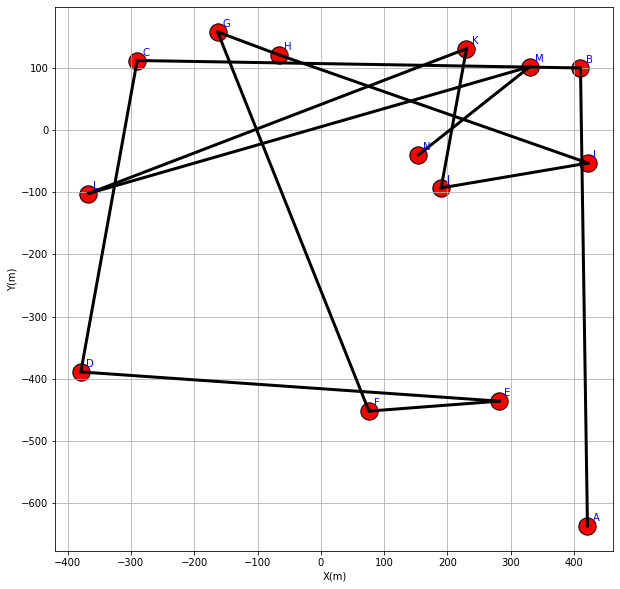

In [ ]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)

Offset=[8,8]
for i, node in enumerate(Nodes_All):
    ax.scatter(Nodes_All[node][0],Nodes_All[node][1], s=300,c='r',edgecolor='k')
    ax.annotate(node, xy=(Nodes_All[node][0]+Offset[0], Nodes_All[node][1]+Offset[1]),color='b')

for i in range (len(DF)-1):
    One=int(DF['Index'][i])
    Two=int(DF['Index'][i+1])
    ax.plot([Nodes_All[List_Nodes[One]][0],Nodes_All[List_Nodes[Two]][0]],
            [Nodes_All[List_Nodes[One]][1],Nodes_All[List_Nodes[Two]][1]],c='k',lw=3)

ax.grid(axis='both')
ax.set_xlabel('X(m)')
ax.set_ylabel('Y(m)')

## Initialize the algorithm solver

In [ ]:
Test=Dijkstra()

### Set Nodes

In [ ]:
for word in Nodes_All:
    Test.add_node(word)
Test.Nodes

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N'}

### Set Edges

In [ ]:
for i in range (len(DF)-1):
    One=int(DF['Index'][i])
    Two=int(DF['Index'][i+1])
    Dist=np.array([Nodes_All[List_Nodes[One]][0],Nodes_All[List_Nodes[One]][1]])-np.array([Nodes_All[List_Nodes[Two]][0],
                                                                                           Nodes_All[List_Nodes[Two]][1]]) # Euclidean Distance
    Dist=np.linalg.norm(Dist)
    Test.add_edge(List_Nodes[One],List_Nodes[Two],Dist)

In [ ]:
Test.Edges

defaultdict(list,
            {'A': ['B'],
             'B': ['A', 'C'],
             'C': ['B', 'D'],
             'D': ['C', 'E'],
             'E': ['D', 'F'],
             'F': ['E', 'G'],
             'G': ['F', 'H'],
             'H': ['G', 'I'],
             'I': ['H', 'J'],
             'J': ['I', 'K'],
             'K': ['J', 'L'],
             'L': ['K', 'M'],
             'M': ['L', 'N'],
             'N': ['M']})

In [ ]:
Test.Distances

{('A', 'B'): 737.0820849810419,
 ('B', 'A'): 737.0820849810419,
 ('B', 'C'): 700.102849587116,
 ('C', 'B'): 700.102849587116,
 ('C', 'D'): 508.8437874239991,
 ('D', 'C'): 508.8437874239991,
 ('D', 'E'): 662.6688464082192,
 ('E', 'D'): 662.6688464082192,
 ('E', 'F'): 206.6204249342257,
 ('F', 'E'): 206.6204249342257,
 ('F', 'G'): 655.1496012362368,
 ('G', 'F'): 655.1496012362368,
 ('G', 'H'): 103.81714694596457,
 ('H', 'G'): 103.81714694596457,
 ('H', 'I'): 518.0926558058896,
 ('I', 'H'): 518.0926558058896,
 ('I', 'J'): 235.42302351299458,
 ('J', 'I'): 235.42302351299458,
 ('J', 'K'): 227.54340245324627,
 ('K', 'J'): 227.54340245324627,
 ('K', 'L'): 640.8572383924519,
 ('L', 'K'): 640.8572383924519,
 ('L', 'M'): 726.2403183519901,
 ('M', 'L'): 726.2403183519901,
 ('M', 'N'): 226.14154859291116,
 ('N', 'M'): 226.14154859291116}

### Consider node A as the origin node

In [ ]:
Result,Path,TotalPath=Test.find_path('A')

In [ ]:
Result

{'A': 0,
 'B': 737.0820849810419,
 'C': 1437.184934568158,
 'D': 1946.0287219921572,
 'E': 2608.6975684003764,
 'F': 2815.3179933346023,
 'G': 3470.467594570839,
 'H': 3574.2847415168035,
 'I': 4092.377397322693,
 'J': 4327.800420835688,
 'K': 4555.343823288934,
 'L': 5196.201061681386,
 'M': 5922.441380033376,
 'N': 6148.582928626287}

In [ ]:
Path

{'B': 'A',
 'C': 'B',
 'D': 'C',
 'E': 'D',
 'F': 'E',
 'G': 'F',
 'H': 'G',
 'I': 'H',
 'J': 'I',
 'K': 'J',
 'L': 'K',
 'M': 'L',
 'N': 'M'}

### Path from origin node to any other node in the network

In [ ]:
TotalPath

defaultdict(list,
            {'A': ['A'],
             'B': ['B', 'A'],
             'C': ['C', 'B', 'A'],
             'D': ['D', 'C', 'B', 'A'],
             'E': ['E', 'D', 'C', 'B', 'A'],
             'F': ['F', 'E', 'D', 'C', 'B', 'A'],
             'G': ['G', 'F', 'E', 'D', 'C', 'B', 'A'],
             'H': ['H', 'G', 'F', 'E', 'D', 'C', 'B', 'A'],
             'I': ['I', 'H', 'G', 'F', 'E', 'D', 'C', 'B', 'A'],
             'J': ['J', 'I', 'H', 'G', 'F', 'E', 'D', 'C', 'B', 'A'],
             'K': ['K', 'J', 'I', 'H', 'G', 'F', 'E', 'D', 'C', 'B', 'A'],
             'L': ['L', 'K', 'J', 'I', 'H', 'G', 'F', 'E', 'D', 'C', 'B', 'A'],
             'M': ['M',
              'L',
              'K',
              'J',
              'I',
              'H',
              'G',
              'F',
              'E',
              'D',
              'C',
              'B',
              'A'],
             'N': ['N',
              'M',
              'L',
              'K',
              'J',

### Plot shortest path from the origin node (i.e. A) to any other node in the network

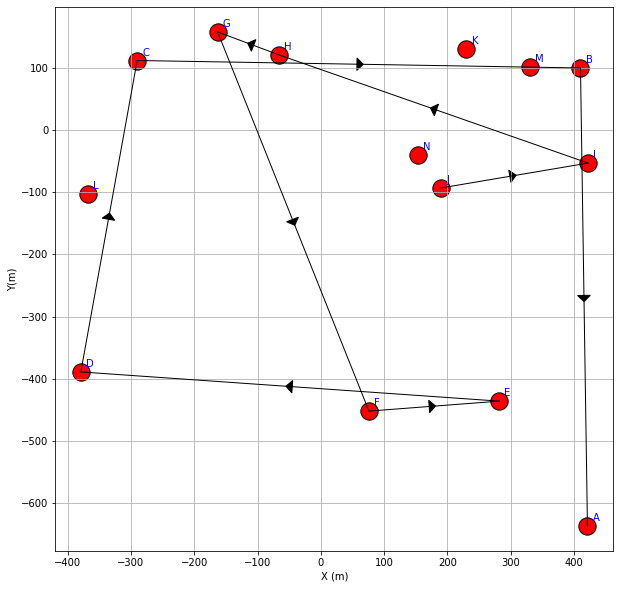

In [ ]:
Test.path_plot(Nodes_All,Node='J',lw=1)

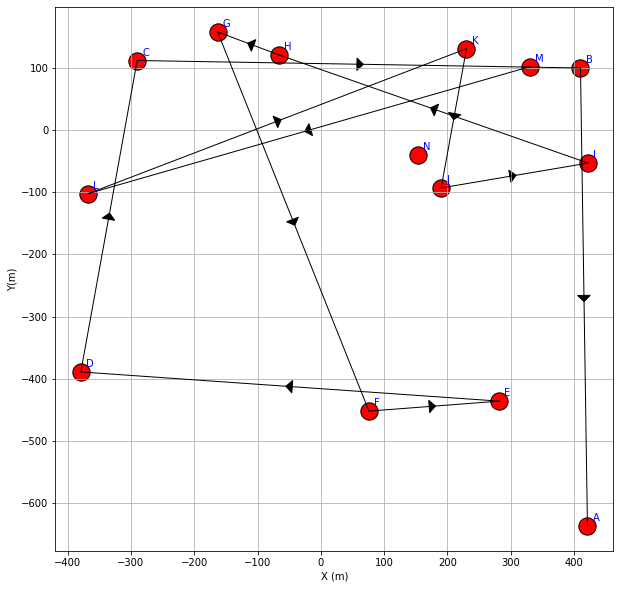

In [ ]:
Test.path_plot(Nodes_All,Node='M',lw=1)

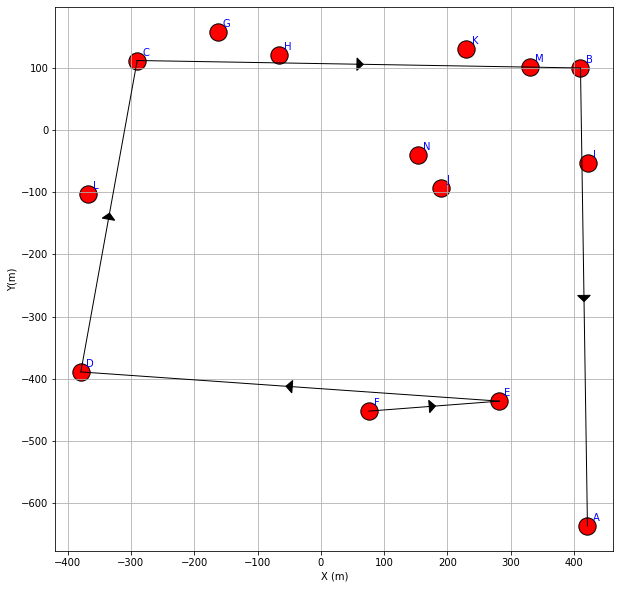

In [ ]:
Test.path_plot(Nodes_All,Node='F',lw=1)

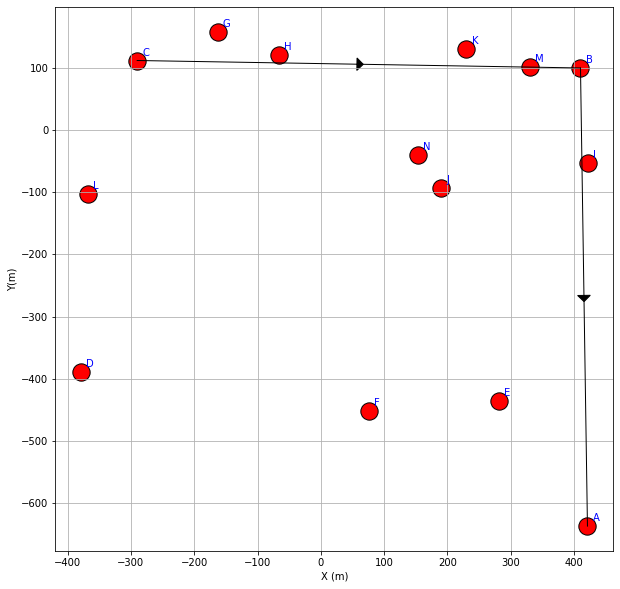

In [ ]:
Test.path_plot(Nodes_All,Node='C',lw=1)